<a href="https://colab.research.google.com/github/BBMRI-ERIC/ISO23494-PROV-demonstrator/blob/main/PBS/biobank-workflow/sampleDeliveryProv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#
# INSTALL PACKAGES
#
!pip install prov

In [86]:
import prov.model as prov
import json

from prov.dot import prov_to_dot
from IPython.display import SVG



document = prov.ProvDocument()

document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/PBS/Biobank')
document.add_namespace('cpim', 'http://cpim.org/')
document.add_namespace('biobank', 'http://biobank.org/')
document.add_namespace('scanlab', 'http://scanlab.org/')
document.add_namespace('pathology', 'http://pathology.org/')


#**********************************************************************************************************************************************************************#
#*******************************************************************************BIOBANK********************************************************************************#
#**********************************************************************************************************************************************************************#

############################################################################
######################Biobank_delivery20201121_5784167######################
############################################################################
delivery20201121_5784167 = document.bundle('biobank:Biobank_delivery20201121_5784167')

delivery20201121_5784167.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/PBS/Biobank/delivery_2020-11-21_5784167/')


#########################################################################
######################Creation of actors in Biobank######################
#########################################################################
delivery20201121_5784167.agent('biobank:WORKER_7275457', {prov.PROV_TYPE: 'prov:Person', 'name': "Anna Aligator"})
delivery20201121_5784167.agent('biobank:WORKER_7275987', {prov.PROV_TYPE: 'prov:Person', 'name': "Tom Turkey"})



##########################################################################
######################Creation of entitys in Biobank######################
##########################################################################
SLIDE_215784545 = delivery20201121_5784167.entity('biobank:SLIDE_215784545', ((prov.PROV_TYPE, "Slide"),('cpim:externalId', "HansHuber_1988-05-04_Tumor_4")))



#Storing
delivery20201121_5784167.activity('biobank:act_57584', '1988-05-04T08:00:00.024000+01:00','2020-11-21T08:15:00.024000+01:00', {prov.PROV_TYPE: "Storing in Storage"})
delivery20201121_5784167.wasAssociatedWith('biobank:act_57584', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
delivery20201121_5784167.used('biobank:SLIDE_215784545','biobank:act_57584' )



#Put slide out of Storage
delivery20201121_5784167.activity('biobank:act_15754', '2020-11-21T08:15:01.024000+01:00',None, {prov.PROV_TYPE: "Picking"})
delivery20201121_5784167.wasAssociatedWith('biobank:act_15754', 'biobank:WORKER_7275987',None,None, {prov.PROV_ROLE: "pick"})
delivery20201121_5784167.used('biobank:SLIDE_215784545','biobank:act_15754' )


#Create Message for Transfer
delivery20201121_5784167.entity('biobank:delivery20201121_5784167_outMsg',((prov.PROV_TYPE, "cpim:message"),('cpim:externalId', "HansHuber_1988-05-04_Tumor_4")))
delivery20201121_5784167.wasDerivedFrom('biobank:delivery20201121_5784167_outMsg', 'biobank:SLIDE_215784545')





#**********************************************************************************************************************************************************************#
#*******************************************************************************SCANLAB********************************************************************************#
#**********************************************************************************************************************************************************************#



#########################################################################
######################Creation of actors in ScanLab######################
#########################################################################
document.agent('scanlab:WORKER_487921', {prov.PROV_TYPE: 'prov:Person', 'name': "Brigitte Baboon"})
document.agent('scanlab:WORKER_462879', {prov.PROV_TYPE: 'prov:Person', 'name': "Paul Pinguin"})


#########################################################################
#######################Creation of SOPs in ScanLab#######################
#########################################################################
document.entity( 'scanlab:SOP_CLEANV2', ((prov.PROV_TYPE, "SOP"),))
document.entity( 'scanlab:SOP_INCOMEV5', ((prov.PROV_TYPE, "SOP"),))
document.entity( 'scanlab:SOP_SCANV3', ((prov.PROV_TYPE, "SOP"),))

############################################################################
##########################ScanLab_scan20201121_5789#########################
############################################################################
scan20201121_5789 = document.bundle('scanlab:ScanLab_scan20201121_5789')

#Getting the Message
scan20201121_5789.entity( 'biobank:delivery20201121_5784167_outMsg', ((prov.PROV_TYPE, "cpim:message"),('cpim:externalId', "HansHuber_1988-05-04_Tumor_4")))

#Creating internal enity
scan20201121_5789.entity( 'scanlab:EXTERNAL_SLIDE_45457541', ((prov.PROV_TYPE, "Slide"),('cpim:externalId', "HansHuber_1988-05-04_Tumor_4")))
scan20201121_5789.wasDerivedFrom('scanlab:EXTERNAL_SLIDE_45457541' ,'biobank:delivery20201121_5784167_outMsg')


#IncomeCheck
scan20201121_5789.activity('scanlab:act_1578', '2020-11-21T10:28:01.024000+01:00',None, {prov.PROV_TYPE: "incomeCheck"})
scan20201121_5789.wasAssociatedWith('scanlab:act_1578', 'scanlab:WORKER_487921',None,None, {prov.PROV_ROLE: "checking"})
scan20201121_5789.used('scanlab:EXTERNAL_SLIDE_45457541','scanlab:act_1578' )
scan20201121_5789.used('scanlab:SOP_INCOMEV5','scanlab:act_1578' )


#Cleaning
scan20201121_5789.activity('scanlab:act_9757', '2020-11-22T11:03:01.024000+01:00',None, {prov.PROV_TYPE: "cleaning"})
scan20201121_5789.wasAssociatedWith('scanlab:act_9757', 'scanlab:WORKER_462879',None,None, {prov.PROV_ROLE: "cleaning"})
scan20201121_5789.used('scanlab:EXTERNAL_SLIDE_45457541','scanlab:act_9757' )
scan20201121_5789.used('scanlab:SOP_CLEANV2','scanlab:act_9757' )


#Scanning
scan20201121_5789.activity('scanlab:act_9756', '2020-11-23T12:35:01.024000+01:00',None, {prov.PROV_TYPE: "scanning"})
scan20201121_5789.wasAssociatedWith('scanlab:act_9756', 'scanlab:WORKER_487921',None,None, {prov.PROV_ROLE: "scanning"})
scan20201121_5789.used('scanlab:EXTERNAL_SLIDE_45457541','scanlab:act_9756' )
scan20201121_5789.used('scanlab:SOP_SCANV3','scanlab:act_9756' )
scan20201121_5789.entity( 'scanlab:WSI_9754187', ((prov.PROV_TYPE, "WSI"),))
scan20201121_5789.wasInfluencedBy( 'scanlab:WSI_9754187','scanlab:act_9756')

#Storing
scan20201121_5789.activity('scanlab:act_3657', '2020-11-24T10:29:01.024000+01:00',None, {prov.PROV_TYPE: "storing"})
scan20201121_5789.wasAssociatedWith('scanlab:act_3657', 'scanlab:WORKER_462879',None,None, {prov.PROV_ROLE: "storing"})
scan20201121_5789.used('scanlab:WSI_9754187','scanlab:act_3657' )
scan20201121_5789.used('scanlab:SOP_SCANV3','scanlab:act_3657' )


#Create Message(s) for Transfer
scan20201121_5789.entity('scanlab:usb_transfer_outMsg_974',((prov.PROV_TYPE, "cpim:message"),))
scan20201121_5789.wasDerivedFrom('scanlab:usb_transfer_outMsg_974', 'scanlab:WSI_9754187')


scan20201121_5789.entity('scanlab:slide_transfer_outMsg_976',((prov.PROV_TYPE, "cpim:message"),))
scan20201121_5789.wasDerivedFrom('scanlab:slide_transfer_outMsg_976', 'scanlab:EXTERNAL_SLIDE_45457541')



#**********************************************************************************************************************************************************************#
#******************************************************************************PATHOLOGY*******************************************************************************#
#**********************************************************************************************************************************************************************#

#########################################################################
#####################Creation of actors in Pathology#####################
#########################################################################
document.agent('pathology:WORKER_97576', {prov.PROV_TYPE: 'prov:Person', 'name': "Cutter Caterpillar"})


############################################################################
######################Pathology_diagnoses20201125_5715######################
############################################################################
pathology_diagnoses20201125_5715 = document.bundle('pathology:Pathology_diagnoses20201125_5715')

#Getting the Message
pathology_diagnoses20201125_5715.entity( 'scanlab:usb_transfer_outMsg_974', ((prov.PROV_TYPE, "cpim:message"),))

#Creating internal enity
pathology_diagnoses20201125_5715.entity( 'pathology:USB_974584', ((prov.PROV_TYPE, "USB-Stick"),))
pathology_diagnoses20201125_5715.wasDerivedFrom('pathology:USB_974584' ,'scanlab:usb_transfer_outMsg_974')

#Income
pathology_diagnoses20201125_5715.activity('pathology:act_5879', '2020-11-21T10:28:01.024000+01:00',None, {prov.PROV_TYPE: "deliveryAceptance"})
pathology_diagnoses20201125_5715.wasAssociatedWith('pathology:act_5879', 'pathology:WORKER_97576',None,None, {prov.PROV_ROLE: "confirming"})
pathology_diagnoses20201125_5715.used('pathology:USB_974584','pathology:act_5879' )




document.get_provn() # =>



In [ ]:
#Print in Json Style
jsonstring  = json.loads (document.serialize())
print(json.dumps(jsonstring, indent=4))


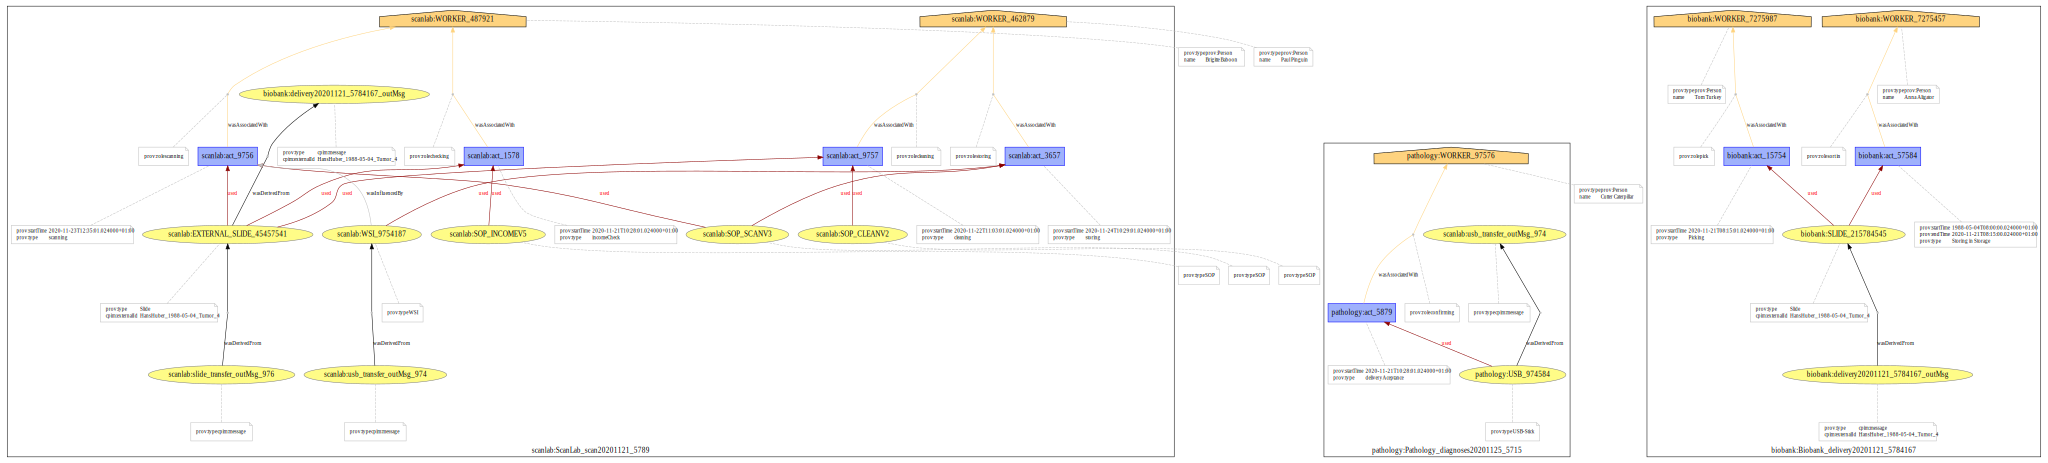

In [87]:
#Show SVG
dotrep =   prov_to_dot(document)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)